In [72]:
# General Library
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# Data Handling
import os
import zipfile
from PIL import Image

In [73]:
# For saving model
import keras

In [1]:
# You can modify this, ganti ganti sj kalau directorynya berbeda, ini pake struktur fish diseases->jenis jenis penyakitnya
# Jadi langsung satu file dipisah train sama validasinya ada di line selanjutnya
DATA_DIR = './Fish Diseases/'

In [75]:
def train_val_dataset():
    training_dataset, validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory=DATA_DIR, 
        image_size=(220, 220), 
        batch_size=20,
        label_mode = 'categorical',
        validation_split=0.2,
        subset='both',
        shuffle=True,
        seed=42)
    return training_dataset, validation_dataset

In [76]:
training_dataset, validation_dataset = train_val_dataset()

Found 1747 files belonging to 7 classes.
Using 1398 files for training.
Using 349 files for validation.


In [77]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(220,220,3)),
        tf.keras.layers.Rescaling(1./255),

        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(7, activation='softmax')
    ])
    
    model.compile( 
        optimizer=tf.keras.optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy'] 
	)
    return model

In [78]:
model = create_model()

In [79]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_13 (Rescaling)             │ (None, 220, 220, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 218, 218, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 109, 109, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 107, 107, 8)         │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 53, 53, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 22472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 22472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 512)                 │      11,506,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,511,375 (43.91 MB)

 Trainable params: 11,511,375 (43.91 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Define a Callbacks for model.fit later
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= 0.95:
            self.model.stop_training = True
            print("\n Reached 95% accuracy!")

In [81]:
history = model.fit(
    training_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks = [EarlyStoppingCallback()]
)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 18s 197ms/step - accuracy: 0.1838 - loss: 2.8500 - val_accuracy: 0.2521 - val_loss: 1.8771
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 185ms/step - accuracy: 0.3034 - loss: 1.8139 - val_accuracy: 0.3181 - val_loss: 1.7635
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - accuracy: 0.4036 - loss: 1.5872 - val_accuracy: 0.3811 - val_loss: 1.6646
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - accuracy: 0.5098 - loss: 1.3661 - val_accuracy: 0.3696 - val_loss: 1.6132
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 196ms/step - accuracy: 0.5936 - loss: 1.0885 - val_accuracy: 0.3782 - val_loss: 1.7204
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 197ms/step - accuracy: 0.7893 - loss: 0.6946 - val_accuracy: 0.3811 - val_loss: 1.9034
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 212ms/step - accuracy: 0.9012 - loss: 0.3784 - val_accuracy: 0.3954 - val_loss: 2.1935
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.9623 - loss: 0.2018
 Reached 95

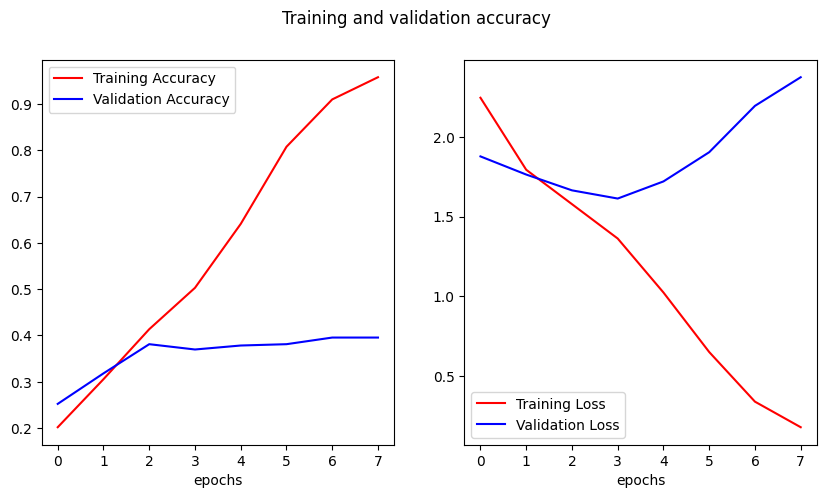

In [82]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [83]:
model.save("my_model1.keras")